# What is an audio signal?

## From the acoustic lecture

*As a reminder from the acoustic lecture*

An audio signal is the recording of the fluctuation in air pressure (in Pascal) around an equilibrium pressure. Noise or sound can thus be represented as a *wave*, propagating through space over time.

Acoustic waves therefore need 3 elements to be generated and perceived:
- a transmitter: in a large number of cases, this is a mechanical element that vibrates (your vocal cords)
- a propagation medium: without air or water, there's no sound (Star Wars is a total fake)
- a receiver: a membrane that vibrates when struck by the wave (your eardrum).

<img src="Figures/signal.png" style="height:300px" />

## Issue = how do I get it inside my computer?

In [1]:
# Import packages to launch code
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import scipy.signal as signal

In [2]:
%matplotlib widget

In [3]:
# Audio signal parameters
duree = 2 # Duration in seconds
fs = 1000 # Sampling frequency in Hertz
Ts = 1/fs
amp = 0.1 # Amplitude in Pascal

In [4]:
# Sinus creation
f0 = 10 # Sinus frequency
t = np.arange(0, duree, 1/fs) # Time vector
sinus = amp*np.sin(2*np.pi*f0*t)

Text(0.5, 1.0, 'Here is my signal')

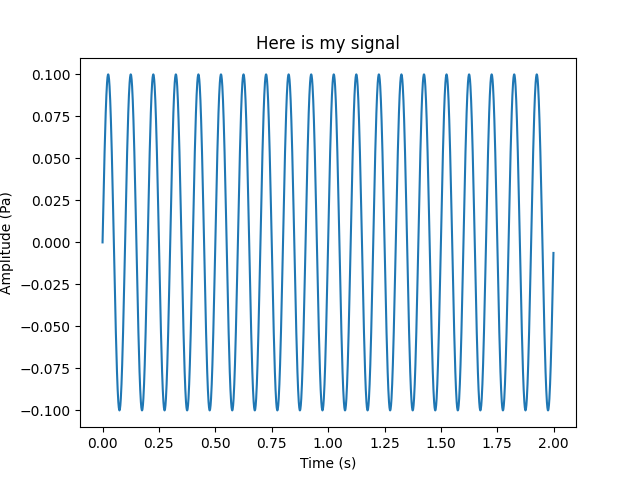

In [5]:
# Sinus representation
plt.figure()
plt.plot(t, sinus)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (Pa)")
plt.title("Here is my signal")

In [6]:
# Define the reference pressure
pref = 2*10**(-5)

# Compute the amplitude in dB
amp_dB = 20*np.log10(amp/pref)
print(f"{amp_dB} dB")

73.97940008672037 dB


*Be careful* with the dB scale, it is not linear, when you double the acoustic pressure, you "just" add 6 dB

In [7]:
amp_dB_double = 20*np.log10(2*amp/pref)
print(f"{amp_dB_double} dB")

80.0 dB


## How is it described in my computer?

<img src="Figures/ADC_sketch.png" style="height:400px" />

#### 1/ Microphone sensitivity

A first parameter to take into account is the microphone sensitivity. As reminded in the sketch below, a microphone has a membrane that vibrates, and this is this phenomenon that trasforms the acoustic signal in Pascal (Pa) to Volt (V).

The microphone capacity to transform Pascal in Volt is known as the sensitivity, given in V/Pa. You cannot control it, it is imposed by the microphone you used, and in particular its quality. Due to the technology used (MEMS) and their environment (the box they are placed in), the AudioMoth microphones have a varying sensitivity along time and environmental conditions. Therefore absolute acoutic pressure in Pascal cannot be totally trusted. However this is not what is interesting for our studies. 

<img src="Figures/micro_fig.png" style="height:200px" />

In [8]:
# Transform the signal from Pascal to Volt
S = 400 # in mV/Pa (example for a Gras microphone)
sinus_V = S*sinus

Text(0.5, 1.0, 'My signal in Volt')

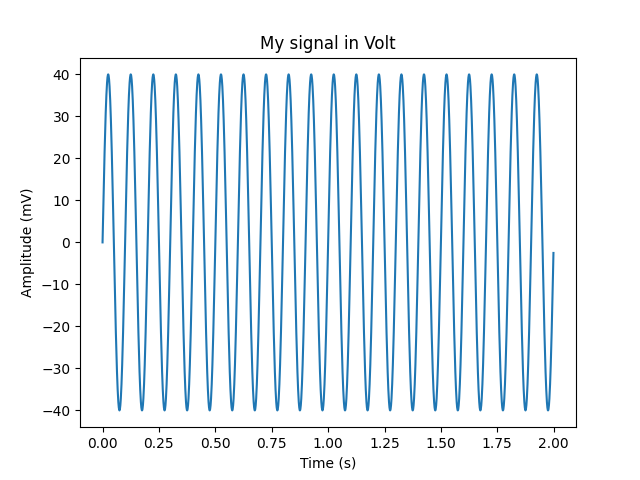

In [9]:
# Sinus representation in Volt
plt.figure()
plt.plot(t, sinus_V)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.title("My signal in Volt")

#### 2/ Signal discretization in time

A very important concept in signal processing to understand concerns the fact that this signal, although continuous in real life, is *digitized*, and therefore discretized as soon as it passes through our computer. So we're no longer dealing with a continuous signal (known as *analog*), but with a discrete signal (known as *digital*), and the correct description of this signal depends on the frequency at which we record two consecutive points of the signal - which defines our **sampling frequency**. The higher the sampling frequency, the better the signal is described, but the more space it takes up in memory.

If I represent the same signal as above, but as it is really seen by the computer, it gives this.

Text(0, 0.5, 'Amplitude (mV)')

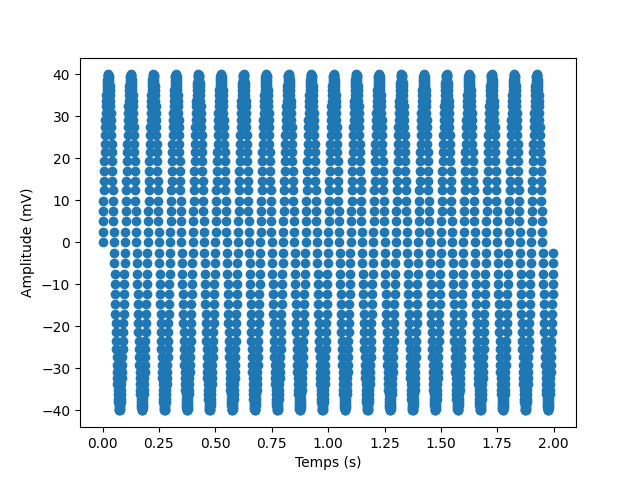

In [10]:
# Discretized sinus
plt.figure()
plt.scatter(t, sinus_V)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (mV)")

#### 3/ Amplitude discretization

After time discretization, it is important to understand that the successive amplitudes of the signal are also discretized: it is called signal quantization. A common value for signal quantization is 16-bits, which means that 16 bits are used so 65,536 amplitude values can be encoded.

In the example below, only 2 bits are used for illustration purposes, resulting in only 4 different amplitude values that can be encoded: 00 / 01 / 10 / 11.

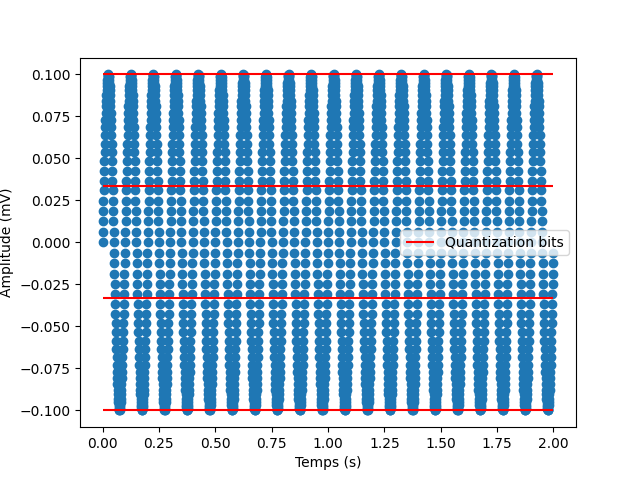

In [11]:
# Amplitude discretization representation
plt.figure()
plt.scatter(t, sinus)
plt.hlines(amp*np.linspace(-1, 1, 4), 0, 2, color="r", label="Quantization bits")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (mV)")
plt.legend()

#### 4/ Gain

Why should we need some gain? Let's look at an example: we record a new signal which has a really small amplitude.

In [12]:
new_amp = amp*0.1
sinus_small = new_amp*np.sin(2*np.pi*f0*t)

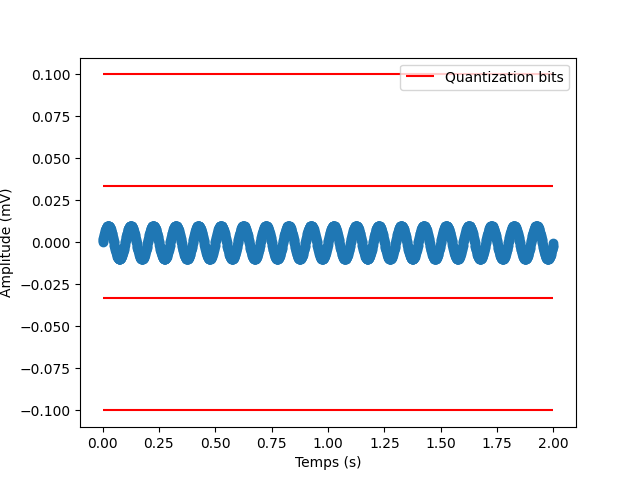

In [13]:
# Sinus representation
plt.figure()
plt.scatter(t, sinus_small)
plt.hlines(amp*np.linspace(-1, 1, 4), 0, 2, color="r", label="Quantization bits")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (mV)")
plt.legend()

We see that our quantization bits are too high to describe our signal. So to resolve this issue, we can introduce some gain G in order to let our signal be described correctly by our quantization.

In [14]:
G = 5
sinus_small_with_gain = G*sinus_small

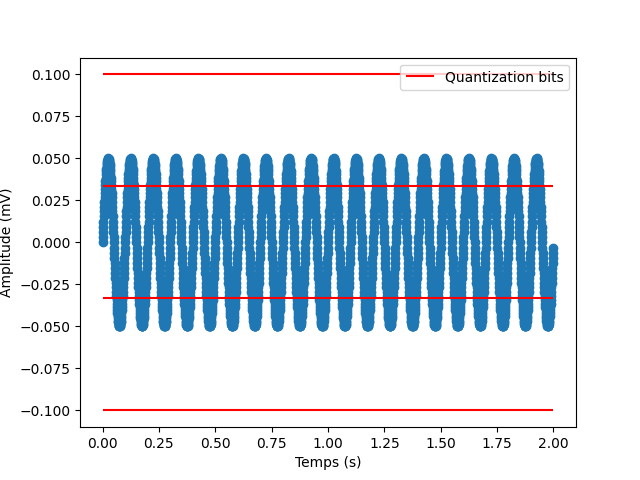

In [15]:
# Sinus representation with gain
plt.figure()
plt.scatter(t, sinus_small_with_gain)
plt.hlines(amp*np.linspace(-1, 1, 4), 0, 2, color="r", label="Quantization bits")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (mV)")
plt.legend()

The goal is to adjust the gain to spread the maximum quantization scale, without exceeding it. The difficulty is that the recorded sounds are not known in advance.

##### 5/ Peak-to-peak amplitude

The final parameter to numerize an acoustic signal is the peak-to-peak amplitude. This parameter is used to normalized the signal between -1 and 1. 
It is not always used, but it can be helpful to display all the recorded signals on the same scale.

If we take our previous example, we expect our signal to lie between -0.1 and 0.1 V, so our peak-to-peak amplitude is equal to 0.2. So if we represent our signal with gain we obtain : 

In [16]:
# Normalized sinus
App = 0.2
sinus_norm = sinus_small_with_gain/(App/2)

Text(0.5, 1.0, 'Normalized signal')

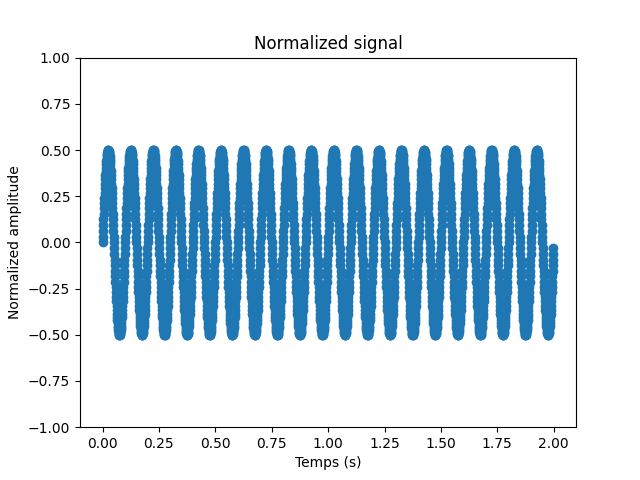

In [17]:
# Sinus representation with peak-to-peak amplitude
plt.figure()
plt.scatter(t, sinus_norm)
plt.xlabel("Temps (s)")
plt.ylabel("Normalized amplitude")
plt.ylim([-1, 1])
plt.title("Normalized signal")

## How to represent a signal?

So far we have seen only temporal representations of signals: the amplitude varies along time. However, in acoustics, it is often a good practice to change the represantation of the signal, and look at its frequencies.
The mathematical tool to do that is the Fourier transform. It decomposes the signal on a mathematical basis composed of sinus and cosinus. So let's look at what it gives for our perfect sinus.

In [18]:
# Compute the FFT
fft_sin = 1/sinus.size*np.fft.rfft(sinus)
freqs = np.fft.rfftfreq(sinus.size, Ts)

Text(0, 0.5, 'Spectrum magnitude (Pa)')

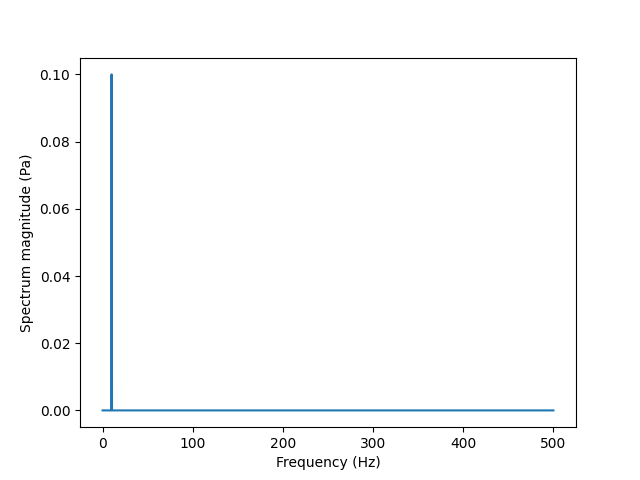

In [19]:
# Plot the FFT
plt.figure()
plt.plot(freqs, 2*np.abs(fft_sin))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectrum magnitude (Pa)")

In [20]:
# We can listen to it
sd.play(sinus, fs)

To correctly represent a signal, you should take enough samples along time. Shannon theorem gives the minimal number of samples, you should at least have $f_s >= 2 \times f_{max}$ with $f_s$ the sampling frequency (number of samples per second) and $f_{max}$ the maximum frequency of your signal.

If we play with our parameters, it means that we can go up to 500 Hz with our 1000 Hz sampling frequency.

## Combine both time and frequency

In [21]:
# Compute the periodogram
f_spectro, t_spectro, Sxx = signal.spectrogram(sinus, fs)

Text(0.5, 0, 'Time [sec]')

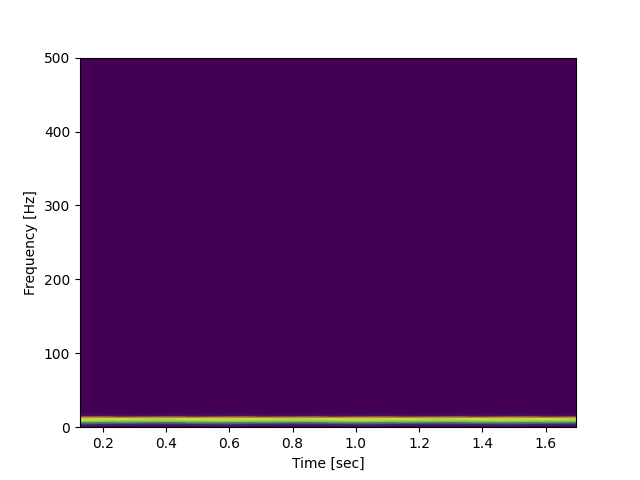

In [22]:
plt.figure()
plt.pcolormesh(t_spectro, f_spectro, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

## Other cases

From this first example, we can see lots of different cases to understand better what are these signal processing tools:
- Sum of sinuses
- Addition of a so called white noise
- See the case of a chirp: the frequency changes through time

In [23]:
# New signal to test
duree = 2 # Duration in seconds
fs = 44100 # Sampling frequency in Hertz
Ts = 1/fs
amp = 0.1 # Amplitude in Pascal
f0 = 1000 # Sinus frequency

t = np.arange(0, duree, 1/fs) # Time vector
sig_test = signal.chirp(t, f0=100, f1=5000, t1=2, method='linear')
# amp*np.sin(2*np.pi*f0*t) + amp*np.sin(2*np.pi*(f0+50)*t)
# + amp*2*(np.random.rand(t.size)-0.5)
# signal.chirp(t, f0=100, f1=5000, t1=2, method='linear')

Text(0.5, 1.0, 'Plot of the test signal')

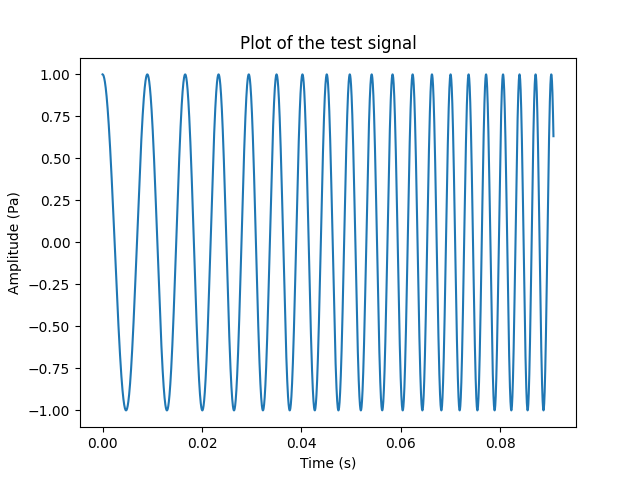

In [24]:
# Plot this signal
plt.figure()
plt.plot(t[:4000], sig_test[:4000])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (Pa)")
plt.title("Plot of the test signal")

Text(0, 0.5, 'Spectrum magnitude (Pa)')

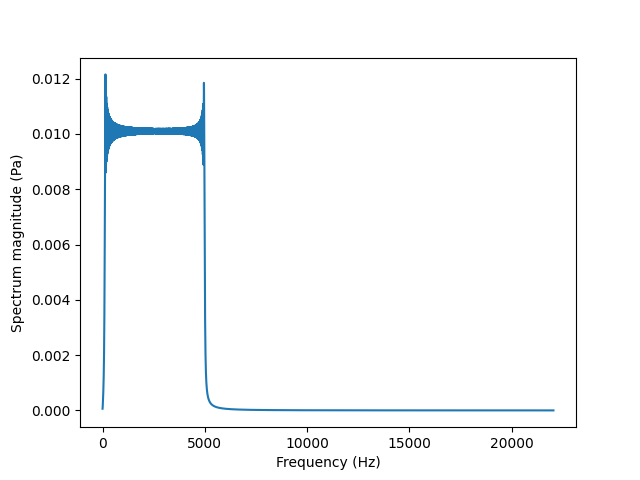

In [25]:
# Compute the FFT and display it
fft_sig = 1/sig_test.size*np.fft.rfft(sig_test)
freqs = np.fft.rfftfreq(sig_test.size, Ts)

plt.figure()
plt.plot(freqs, 2*np.abs(fft_sig))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectrum magnitude (Pa)")

Text(0.5, 0, 'Time [sec]')

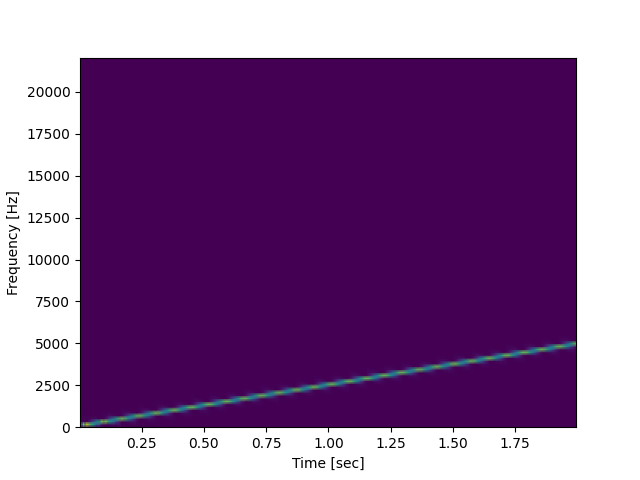

In [26]:
# Compute the periodogram and display it
f_spectro, t_spectro, Sxx = signal.spectrogram(sig_test, fs)

plt.figure()
plt.pcolormesh(t_spectro, f_spectro, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [27]:
# We can listen to it
sd.play(sig_test, fs)